In [9]:
# import packages
import pandas as pd # For reading and manipulating 2D data (like spreadsheets)
import numpy as np # For doing numerical calculations (literally NUMerical PYthon)
import matplotlib.pyplot as plt # For making graphs

from sklearn import datasets, linear_model

# Setting to show graphs below cells in colab
%matplotlib inline

In [10]:
co2 = pd.read_csv(r"../data/CO2.csv")
temp = pd.read_csv(r"../data/Temp.csv")

joint = pd.merge(co2, temp, on='Year', how='inner')
joint = joint.dropna()

joint

,Year,CO2,Temp
0,1850,1.967520e+08,-0.417711
1,1851,1.986681e+08,-0.233350
2,1852,2.074142e+08,-0.229399
3,1853,2.171204e+08,-0.270354
4,1854,2.550332e+08,-0.291521
...,...,...,...
168,2018,3.676694e+10,0.762654
169,2019,3.704010e+10,0.891073
170,2020,3.500774e+10,0.922921
171,2021,3.681654e+10,0.761906


In [11]:
co2_array = joint["CO2"].to_numpy().reshape(-1, 1)
temp_array = joint["Temp"].to_numpy().reshape(-1, 1)

regr = linear_model.LinearRegression(fit_intercept=True)
model_3 = regr.fit(co2_array, temp_array)
print(f"The model [ y = {regr.coef_[0][0]} x + {regr.intercept_[0]}] has score " + 
      f"{regr.score(co2_array, temp_array)}.")


The model [ y = 3.0157295144233116e-11 x + -0.3871900244402794] has score 0.8550495062379699.


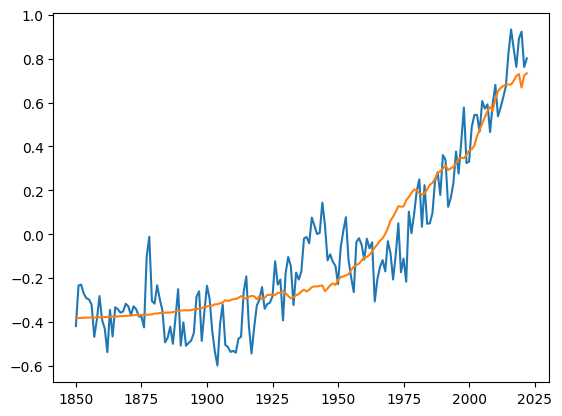

In [13]:
def co2_to_temp(array):
    predict_array = model_3.predict(array)

    return predict_array

# inspect the fit in historical data
temp_predict = co2_to_temp(joint["CO2"].to_numpy().reshape(-1, 1))
plt.plot(np.asarray(joint["Year"], float), joint["Temp"])
plt.plot(np.asarray(joint["Year"], float), temp_predict)
plt.show()